<a href="https://colab.research.google.com/github/ujaei21/TIL/blob/master/Ryu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/jldbc/pybaseball

Cloning into 'pybaseball'...
remote: Enumerating objects: 2406, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 2406 (delta 110), reused 128 (delta 58), pack-reused 2174
Receiving objects: 100% (2406/2406), 6.62 MiB | 17.57 MiB/s, done.
Resolving deltas: 100% (1423/1423), done.


In [2]:
cd /content/pybaseball

/content/pybaseball


In [ ]:
pip install -e .

In [4]:
from pybaseball import statcast

In [5]:
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher
playerid_lookup('ryu', 'hyun jin')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,ryu,hyun jin,547943,ryu-h001,ryuhy01,14444,2013.0,2021.0


In [6]:
ryu_stats = statcast_pitcher('2021-07-01', '2021-07-20', 547943)
ryu_stats.head(5)

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FC,2021-07-18,86.7,2.23,5.82,"Ryu, Hyun Jin",621311,547943,field_out,hit_into_play,NaN,NaN,NaN,NaN,5,David Dahl flies out sharply to center fielder...,R,L,L,TOR,TEX,X,8.0,fly_ball,1,0,2021,-0.06,0.63,0.02,2.51,NaN,NaN,NaN,2,7,Top,114.66,41.06,NaN,...,390.0,104.2,33.0,87.7,2096,6.4,633256,547943,643376,665489,543760,669289,666182,641505,543807,545341,54.12,0.723,1.473,0.0,1.0,0.0,0.0,6.0,52,2,Cutter,5,0,0,5,0,5,0,5,Standard,Standard,153,0.000,-0.120
1,FF,2021-07-18,91.0,2.07,5.73,"Ryu, Hyun Jin",621311,547943,NaN,ball,NaN,NaN,NaN,NaN,11,David Dahl flies out sharply to center fielder...,R,L,L,TOR,TEX,B,NaN,NaN,0,0,2021,0.90,1.07,-1.48,2.54,NaN,NaN,NaN,2,7,Top,NaN,NaN,NaN,...,NaN,NaN,NaN,91.2,2066,6.4,633256,547943,643376,665489,543760,669289,666182,641505,543807,545341,54.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,1,4-Seam Fastball,5,0,0,5,0,5,0,5,Standard,Standard,130,0.000,0.016
2,FF,2021-07-18,90.9,2.16,5.77,"Ryu, Hyun Jin",642201,547943,field_out,hit_into_play,NaN,NaN,NaN,NaN,11,Eli White flies out to center fielder George S...,R,R,L,TOR,TEX,X,8.0,fly_ball,0,2,2021,1.05,0.92,-0.27,3.54,NaN,NaN,NaN,1,7,Top,138.35,68.11,NaN,...,326.0,92.9,37.0,91.2,1940,6.4,633256,547943,643376,665489,543760,669289,666182,641505,543807,545341,54.15,0.053,0.090,0.0,1.0,0.0,0.0,3.0,51,3,4-Seam Fastball,5,0,0,5,0,5,0,5,Standard,Standard,131,0.002,-0.101
3,CH,2021-07-18,82.7,2.36,5.75,"Ryu, Hyun Jin",642201,547943,NaN,foul,NaN,NaN,NaN,NaN,6,Eli White flies out to center fielder George S...,R,R,L,TOR,TEX,S,NaN,NaN,0,1,2021,1.00,0.40,0.81,2.65,NaN,NaN,NaN,1,7,Top,NaN,NaN,NaN,...,221.0,79.0,48.0,83.1,1545,6.4,633256,547943,643376,665489,543760,669289,666182,641505,543807,545341,54.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,2,Changeup,5,0,0,5,0,5,0,5,Standard,Standard,116,0.000,-0.035
4,FC,2021-07-18,86.9,2.22,5.90,"Ryu, Hyun Jin",642201,547943,NaN,foul,NaN,NaN,NaN,NaN,13,Eli White flies out to center fielder George S...,R,R,L,TOR,TEX,S,NaN,NaN,0,0,2021,0.03,0.62,-0.86,2.46,NaN,NaN,NaN,1,7,Top,NaN,NaN,NaN,...,8.0,76.5,-16.0,87.4,1992,6.3,633256,547943,643376,665489,543760,669289,666182,641505,543807,545341,54.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,1,Cutter,5,0,0,5,0,5,0,5,Standard,Standard,148,0.000,-0.027


In [7]:
result=ryu_stats[['pitch_type','game_date','release_speed','release_pos_x','release_pos_z','release_spin_rate','release_extension','spin_axis']]

In [8]:
import pandas as pd

In [9]:
pd.DataFrame(result)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,release_spin_rate,release_extension,spin_axis
0,FC,2021-07-18,86.7,2.23,5.82,2096,6.4,153
1,FF,2021-07-18,91.0,2.07,5.73,2066,6.4,130
2,FF,2021-07-18,90.9,2.16,5.77,1940,6.4,131
3,CH,2021-07-18,82.7,2.36,5.75,1545,6.4,116
4,FC,2021-07-18,86.9,2.22,5.90,1992,6.3,148
...,...,...,...,...,...,...,...,...
249,CH,2021-07-01,80.8,2.60,5.84,1707,6.4,116
250,FC,2021-07-01,85.9,2.45,5.98,2005,6.4,139
251,CU,2021-07-01,73.7,2.46,6.13,2458,6.1,322
252,CU,2021-07-01,73.6,2.17,6.23,2500,5.9,322


In [10]:
result[(result['pitch_type']=='FF') & (result['game_date']=='2021-07-07')].mean()

release_speed          90.535714
release_pos_x           2.219762
release_pos_z           5.904524
release_spin_rate    1927.523810
release_extension       6.640476
spin_axis             135.904762
dtype: float64

In [16]:
result[(result['pitch_type']=='FF') & (result['game_date']=='2021-07-07')].mean()

release_speed          90.535714
release_pos_x           2.219762
release_pos_z           5.904524
release_spin_rate    1927.523810
release_extension       6.640476
spin_axis             135.904762
dtype: float64

In [11]:
result[(result['pitch_type']=='FC') & (result['game_date']=='2021-07-07')].mean()

release_speed          86.306250
release_pos_x           2.294375
release_pos_z           5.891250
release_spin_rate    2028.875000
release_extension       6.512500
spin_axis             182.187500
dtype: float64

In [12]:
result[(result['pitch_type']=='FF') & (result['game_date']=='2021-07-01')].mean()

release_speed          89.99500
release_pos_x           2.18175
release_pos_z           5.83600
release_spin_rate    2011.72500
release_extension       6.43250
spin_axis             133.80000
dtype: float64

In [13]:
result[(result['pitch_type']=='FC') & (result['game_date']=='2021-07-01')].mean()

release_speed          85.379167
release_pos_x           2.300417
release_pos_z           5.864583
release_spin_rate    2011.708333
release_extension       6.383333
spin_axis             149.083333
dtype: float64

In [14]:
result[(result['pitch_type']=='CH') & (result['game_date']=='2021-07-07')].mean()

release_speed          81.205556
release_pos_x           2.376111
release_pos_z           5.831111
release_spin_rate    1540.888889
release_extension       6.688889
spin_axis             119.500000
dtype: float64

In [15]:
result[(result['pitch_type']=='CH') & (result['game_date']=='2021-07-01')].mean()

release_speed          80.058333
release_pos_x           2.421667
release_pos_z           5.749167
release_spin_rate    1572.250000
release_extension       6.500000
spin_axis             118.333333
dtype: float64

In [17]:
import numpy as np
result.groupby(['game_date','pitch_type']).agg({'release_speed':np.mean,'pitch_type':np.size,'release_pos_x':np.mean,'release_pos_z':np.mean,'release_spin_rate':np.mean,'release_extension':np.mean})

release_speed  ...  release_extension
game_date  pitch_type                 ...                   
2021-07-01 CH              80.058333  ...           6.500000
           CU              74.155556  ...           6.177778
           FC              85.379167  ...           6.383333
           FF              89.995000  ...           6.432500
2021-07-07 CH              81.205556  ...           6.688889
           CU              73.775000  ...           6.525000
           FC              86.306250  ...           6.512500
           FF              90.535714  ...           6.640476
           SI              83.950000  ...           6.800000
2021-07-18 CH              82.950000  ...           6.445833
           CU              74.750000  ...           6.116667
           FC              87.252174  ...           6.291304
           FF              90.836667  ...           6.360000

[13 rows x 6 columns]

In [18]:
loc1=result[(result['pitch_type']=='FF') & (result['game_date']=='2021-07-18')]
loc2=result[(result['pitch_type']=='FC') & (result['game_date']=='2021-07-18')]
loc3=result[(result['pitch_type']=='CU') & (result['game_date']=='2021-07-18')]
loc4=result[(result['pitch_type']=='CH') & (result['game_date']=='2021-07-18')]

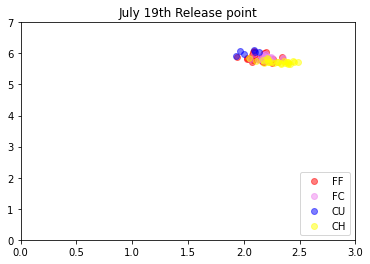

In [19]:

import matplotlib.pyplot as plt

plt.scatter(loc1.release_pos_x,loc1.release_pos_z,color='red',alpha=0.5)
plt.scatter(loc2.release_pos_x,loc2.release_pos_z,color='violet',alpha=0.5)
plt.scatter(loc3.release_pos_x,loc3.release_pos_z,color='blue',alpha=0.5)
plt.scatter(loc4.release_pos_x,loc4.release_pos_z,color='yellow',alpha=0.5)
plt.axis([0, 3, 0, 7])
plt.legend(['FF','FC','CU','CH'],loc=4)
plt.title('July 19th Release point')

plt.savefig('pitchs')
plt.show()

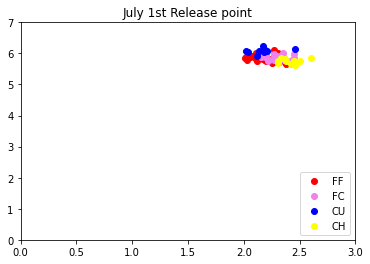

In [20]:

loc1=result[(result['pitch_type']=='FF') & (result['game_date']=='2021-07-01')]
loc2=result[(result['pitch_type']=='FC') & (result['game_date']=='2021-07-01')]
loc3=result[(result['pitch_type']=='CU') & (result['game_date']=='2021-07-01')]
loc4=result[(result['pitch_type']=='CH') & (result['game_date']=='2021-07-01')]

plt.scatter(loc1.release_pos_x,loc1.release_pos_z,color='red')
plt.scatter(loc2.release_pos_x,loc2.release_pos_z,color='violet')
plt.scatter(loc3.release_pos_x,loc3.release_pos_z,color='blue')
plt.scatter(loc4.release_pos_x,loc4.release_pos_z,color='yellow')
plt.axis([0, 3, 0, 7])
plt.legend(['FF','FC','CU','CH'],loc=4)
plt.title('July 1st Release point')

plt.savefig('pitchs1')
plt.show()

In [21]:
target=ryu_stats[['game_date','pitch_type','plate_x', 'plate_z']]

In [22]:
target_FF=target[(target['game_date']=='2021-07-18') & (target['pitch_type']=='FF')]
target_FC=target[(target['game_date']=='2021-07-18') & (target['pitch_type']=='FC')]
target_CH=target[(target['game_date']=='2021-07-18') & (target['pitch_type']=='CH')]
target_CU=target[(target['game_date']=='2021-07-18') & (target['pitch_type']=='CU')]

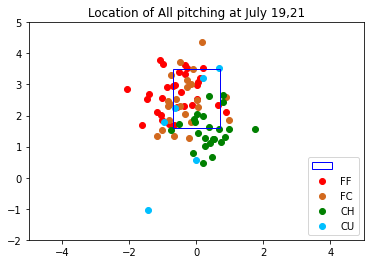

In [23]:
fig,ax = plt.subplots()
plt.scatter(target_FF.plate_x,target_FF.plate_z,color='red')
plt.scatter(target_FC.plate_x,target_FC.plate_z,color='chocolate')
plt.scatter(target_CH.plate_x,target_CH.plate_z,color='green')
plt.scatter(target_CU.plate_x,target_CU.plate_z,color='deepskyblue')
import matplotlib.patches as patches
ax.add_patch(
    patches.Rectangle((-0.7, 1.6),1.4,1.9,edgecolor = 'blue',fill=False)
)
plt.legend(['','FF','FC','CH','CU'],loc=4)
plt.axis([-5, 5, -2, 5])
plt.title('Location of All pitching at July 19,21')
plt.show()

In [63]:
import matplotlib.patches as patches
from datetime import datetime

def date_pitch(start_date,end_date=datetime.today()):

    end_date = end_date.strftime("%Y-%m-%d")
    
    # 데이터 로드
    ryu_stats = statcast_pitcher(start_dt= start_date, end_dt= end_date, player_id = 547943)

    # 데이터 선택
    target=ryu_stats[['game_date','pitch_type','plate_x', 'plate_z']]
    
    # 구종별 저장
    target_FF=target[(target['game_date']== start_date) & (target['pitch_type']=='FF')]
    target_FC=target[(target['game_date']== start_date) & (target['pitch_type']=='FC')]
    target_CH=target[(target['game_date']== start_date) & (target['pitch_type']=='CH')]
    target_CU=target[(target['game_date']== start_date) & (target['pitch_type']=='CU')]

    # 시각화
    fig,ax = plt.subplots()
    plt.scatter(target_FF.plate_x,target_FF.plate_z,color='red')
    plt.scatter(target_FC.plate_x,target_FC.plate_z,color='chocolate')
    plt.scatter(target_CH.plate_x,target_CH.plate_z,color='green')
    plt.scatter(target_CU.plate_x,target_CU.plate_z,color='deepskyblue')
    
    # 스트라이크 존
    ax.add_patch(patches.Rectangle((-0.7, 1.6),1.4,1.9,edgecolor = 'blue',fill=False))
    
    plt.legend(['','FF','FC','CH','CU'],loc=4)
    plt.axis([-5, 5, -2, 5])
    plt.show()

    return 0

Gathering Player Data


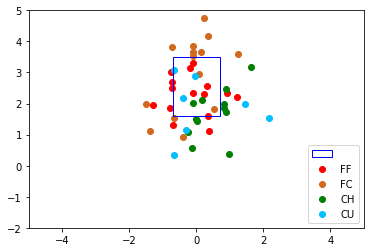

0

In [64]:
date_pitch(start_date = '2021-09-17')

In [75]:
def release_point(start_date,end_date=datetime.today(),verti_angle=30,hori_angle=0):
    
    # end_dt 변환
    end_date = end_date.strftime('%Y-%m-%d')
    
    # 정보 불러오기
    ryu_stats = statcast_pitcher(start_dt=start_date, end_dt= end_date , player_id = 547943)

    # 변수설정
    result = ryu_stats[['game_date','pitch_type','release_pos_x','release_pos_y', 'release_pos_z']]

    # 구종별 저장
    loc1=result[(result['pitch_type']=='FF') & (result['game_date']==start_date)]
    loc2=result[(result['pitch_type']=='FC') & (result['game_date']==start_date)]
    loc3=result[(result['pitch_type']=='CU') & (result['game_date']==start_date)]
    loc4=result[(result['pitch_type']=='CH') & (result['game_date']==start_date)]

    # 시각화
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(loc1.release_pos_x,loc1.release_pos_y,loc1.release_pos_z,color='red')
    ax.scatter(loc2.release_pos_x,loc2.release_pos_y,loc2.release_pos_z,color='chocolate')
    ax.scatter(loc3.release_pos_x,loc3.release_pos_y,loc3.release_pos_z,color='green')
    ax.scatter(loc4.release_pos_x,loc4.release_pos_y,loc4.release_pos_z,color='deepskyblue')


    ax.legend(['FF','FC','CH','CU'],loc=4)
    ax.set_xlim(0,3)
    ax.set_ylim(51,57)
    ax.set_zlim(0,7)

    # 각도설정
    ax.view_init(verti_angle,hori_angle)
    plt.show()

    return 0


Gathering Player Data


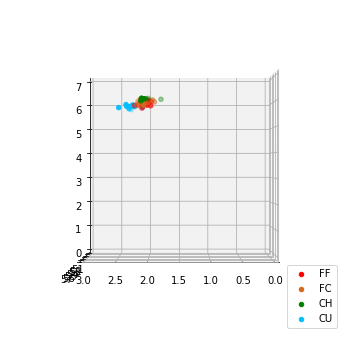

0

In [76]:
release_point(start_date='2021-09-17',verti_angle=0,hori_angle=90)

Gathering Player Data


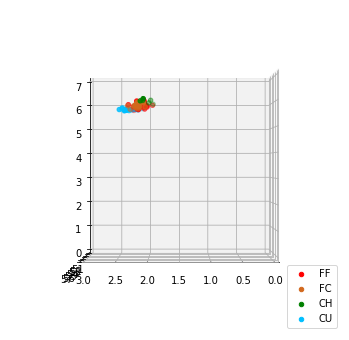

0

In [77]:
release_point(start_date='2021-07-18',verti_angle=0,hori_angle=90)

Gathering Player Data


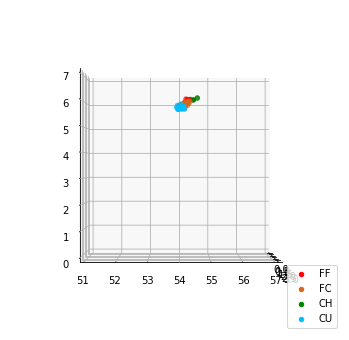

0

In [78]:
release_point(start_date='2021-07-18',verti_angle=0,hori_angle=0)

Gathering Player Data


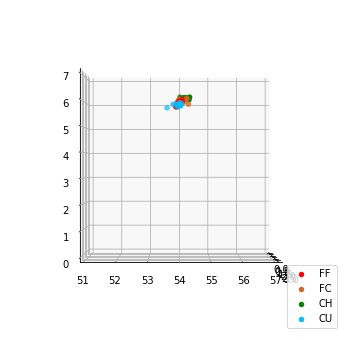

0

In [79]:
release_point(start_date='2021-09-17',verti_angle=0,hori_angle=0)

Gathering Player Data


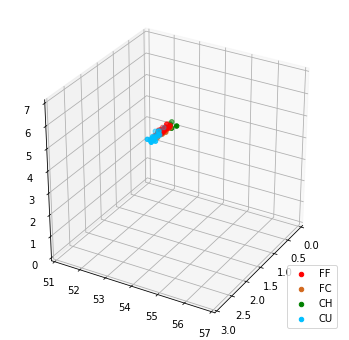

0

In [81]:
release_point(start_date='2021-07-18',verti_angle=30,hori_angle=30)

Gathering Player Data


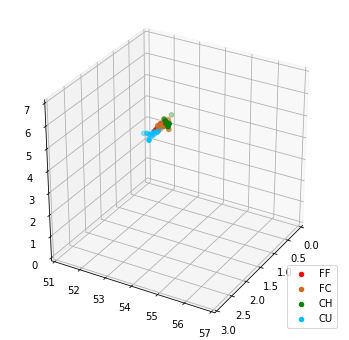

0

In [82]:
release_point(start_date='2021-09-17',verti_angle=30,hori_angle=30)

Gathering Player Data


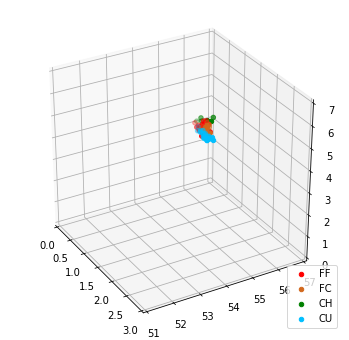

0

In [84]:
release_point(start_date='2021-07-18',verti_angle=30,hori_angle=-30)

Gathering Player Data


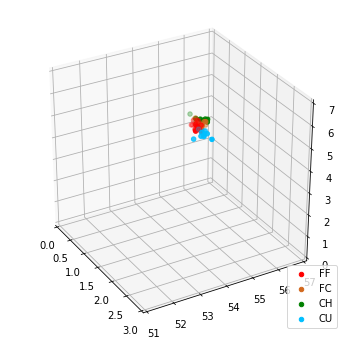

0

In [83]:
release_point(start_date='2021-09-17',verti_angle=30,hori_angle=-30)